In [17]:
# pip install lifelines
# import lifelines
import pip
pip.main(['install','lifelines'])
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


WARNING: Ignoring invalid distribution -rotobuf (c:\users\mitul\appdata\roaming\python\python39\site-packages)


WARNING: Ignoring invalid distribution -rotobuf (c:\users\mitul\appdata\roaming\python\python39\site-packages)


Requirement already satisfied: lifelines in c:\users\mitul\appdata\roaming\python\python39\site-packages (0.27.4)

Requirement already satisfied: pandas>=1.0.0 in c:\users\mitul\anaconda5\lib\site-packages (from lifelines) (1.4.4)

Requirement already satisfied: scipy>=1.2.0 in c:\users\mitul\appdata\roaming\python\python39\site-packages (from lifelines) (1.7.3)

Requirement already satisfied: matplotlib>=3.0 in c:\users\mitul\anaconda5\lib\site-packages (from lifelines) (3.5.2)

Requirement already satisfied: numpy>=1.14.0 in c:\users\mitul\anaconda5\lib\site-packages (from lifelines) (1.21.5)

Requirement already satisfied: autograd-gamma>=0.3 in c:\users\mitul\appdata\roaming\python\python39\site-packages (from lifelines) (0.5.0)

Requirement already satisfied: formulaic>=0.2.2 in c:\users\mitul\appdata\roaming\python\python39\site-packages (from lifelines) (0.5.2)

Requirement already satisfied: autograd>=1.5 in c:\users\mitul\appdata\roaming\python\python39\site-packages (from lifelines) (1.5)

Requirement already satisfied: future>=0.15.2 in c:\users\mitul\anaconda5\lib\site-packages (from autograd>=1.5->lifelines) (0.18.2)

Requirement already satisfied: wrapt>=1.0 in c:\users\mitul\anaconda5\lib\site-packages (from formulaic>=0.2.2->lifelines) (1.14.1)

Requirement already satisfied: astor>=0.8 in c:\users\mitul\appdata\roaming\python\python39\site-packages (from formulaic>=0.2.2->lifelines) (0.8.1)

Requirement already satisfied: interface-meta>=1.2.0 in c:\users\mitul\appdata\roaming\python\python39\site-packages (from formulaic>=0.2.2->lifelines) (1.3.0)

Requirement already satisfied: typing-extensions>=4.2.0 in c:\users\mitul\anaconda5\lib\site-packages (from formulaic>=0.2.2->lifelines) (4.3.0)

Requirement already satisfied: pillow>=6.2.0 in c:\users\mitul\anaconda5\lib\site-packages (from matplotlib>=3.0->lifelines) (9.2.0)

Requirement already satisfied: cycler>=0.10 in c:\users\mitul\anaconda5\lib\site-packages (from matplotlib>=3.0->lifelines) (0.11.0)

Requirement already satisfied: python-dateutil>=2.7 in c:\users\mitul\anaconda5\lib\site-packages (from matplotlib>=3.0->lifelines) (2.8.2)

Requirement already satisfied: fonttools>=4.22.0 in c:\users\mitul\anaconda5\lib\site-packages (from matplotlib>=3.0->lifelines) (4.25.0)

Requirement already satisfied: pyparsing>=2.2.1 in c:\users\mitul\anaconda5\lib\site-packages (from matplotlib>=3.0->lifelines) (3.0.9)

Requirement already satisfied: kiwisolver>=1.0.1 in c:\users\mitul\anaconda5\lib\site-packages (from matplotlib>=3.0->lifelines) (1.4.2)

Requirement already satisfied: packaging>=20.0 in c:\users\mitul\anaconda5\lib\site-packages (from matplotlib>=3.0->lifelines) (21.3)

Requirement already satisfied: pytz>=2020.1 in c:\users\mitul\anaconda5\lib\site-packages (from pandas>=1.0.0->lifelines) (2022.1)

Requirement already satisfied: six>=1.5 in c:\users\mitul\anaconda5\lib\site-packages (from python-dateutil>=2.7->matplotlib>=3.0->lifelines) (1.16.0)

WARNING: Ignoring invalid distribution -rotobuf (c:\users\mitul\appdata\roaming\python\python39\site-packages)


WARNING: Ignoring invalid distribution -rotobuf (c:\users\mitul\appdata\roaming\python\python39\site-packages)


WARNING: Ignoring invalid distribution -rotobuf (c:\users\mitul\appdata\roaming\python\python39\site-packages)


WARNING: Ignoring invalid distribution -rotobuf (c:\users\mitul\appdata\roaming\python\python39\site-packages)


In [3]:
import pandas as pd
# Loading the the survival un-employment data
patient = pd.read_csv("Patient.csv")


NumExpr defaulting to 8 threads.

In [15]:
patient.head()

,PatientID,Followup,Eventtype,Scenario
0,John,1.0,1,A
1,Jess,2.0,1,A
2,Ann,3.0,0,A
3,Mary,4.0,0,A
4,Frank,5.0,1,A


In [14]:
patient.describe()

,Followup,Eventtype
count,10.000000,10.000000
mean,5.420000,0.600000
std,2.993994,0.516398
min,1.000000,0.000000
25%,3.250000,0.000000
50%,5.500000,1.000000
75%,7.550000,1.000000
max,10.000000,1.000000


In [5]:
patient["Followup"].describe()

count    10.000000
mean      5.420000
std       2.993994
min       1.000000
25%       3.250000
50%       5.500000
75%       7.550000
max      10.000000
Name: Followup, dtype: float64

In [6]:
# Spell is referring to time 
T = patient.Followup

In [7]:
# Importing the KaplanMeierFitter model to fit the survival analysis
from lifelines import KaplanMeierFitter

In [8]:
# Initiating the KaplanMeierFitter model
kmf = KaplanMeierFitter()

In [9]:
# Fitting KaplanMeierFitter model on Time and Events for death 
kmf.fit(T, event_observed=patient.Eventtype)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 10 total observations, 4 right-censored observations>

<AxesSubplot:xlabel='timeline'>

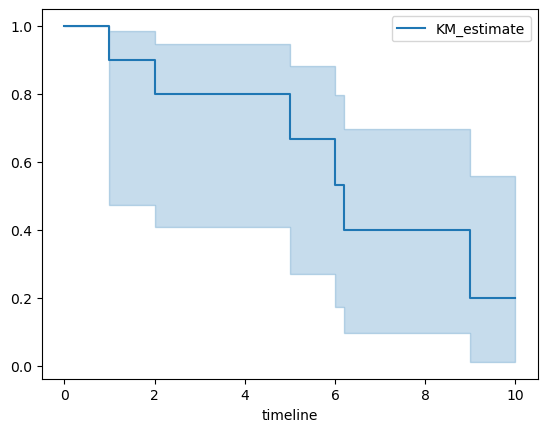

In [10]:
# Time-line estimations plot 
kmf.plot()

In [11]:
# Over Multiple groups 
# For each group, here group is ui
patient.Eventtype.value_counts()

1    6
0    4
Name: Eventtype, dtype: int64

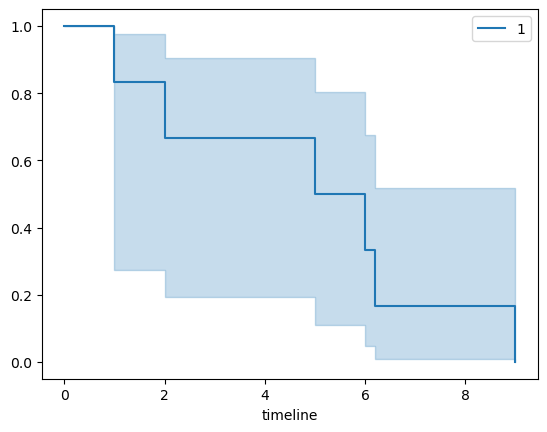

In [12]:
# Applying KaplanMeierFitter model on Time and Events for the group "1"
kmf.fit(T[patient.Eventtype==1], patient.Eventtype[patient.Eventtype==1], label='1')
ax = kmf.plot()

In [20]:
# Applying KaplanMeierFitter model on Time and Events for the group "0"
kmf.fit(T[patient.Eventtype==0], patient.Eventtype[patient.Eventtype==0], label='0')
kmf.plot(ax=ax)